# Celsius to Fahrenheit Model
for later - onnx takes torch models and extracts them so they can be deployed to the web, uses github

$ y=w*x+b $ (this is the inference function (line equation))
weight * x +bias (w1, w2, w3, typically many weights but we just have one in this example)

In [16]:
# !pip install matplotlib 
# this is how to install things without closing the notebook

In [17]:
import torch
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt #used to visualize

## Data

In [18]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0] #celsius

t_f = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] #fahreneheit


In [19]:
#this data is in python lists, so we need to convert it into a torch tensor
t_c_t=torch.tensor(t_c)
t_f_t=torch.tensor(t_f)
#print them to make sure
print(t_c_t)
print(t_f_t)

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])
tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])


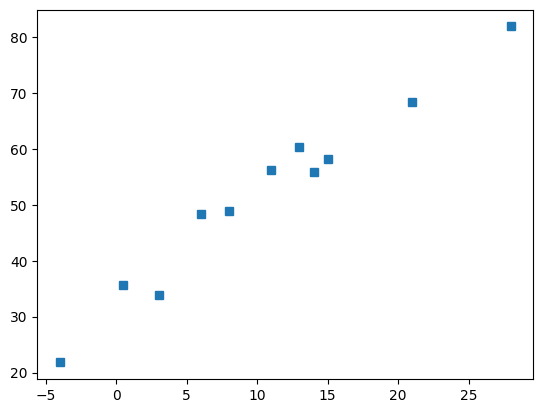

In [20]:
#lets visualize our data in a nice way using matplotlib 
plt.plot(t_c_t.numpy(), t_f_t.numpy(), 's') #.numpy converts it back to a python list so that plt can use it "s" means square dots, could also be o for circles

## Part 1: Inference function or Model

In [21]:
#define the equation/model
#x will be t_c data points
def model(x, w, b): 
    return w*x+b

#we don't have w or b so we need to learn these parameters from the data 
#the model will take inputs and determine outputs
# we need to define the loss function 

## Part 2: Optimization Objective
$ J = \sum_{i=1}^{h} {(yi - \hat{yi})^2} $

In [22]:
#optimization objective
#loss equation
#takes the difference between real and pred and square it, called MSE (mean squared error)
    #you should use the built in function, but done by hand now to see how it works
    #has cross entropy
def loss_fn(y_pred, y_real):
    squared_diffs=(y_pred - y_real)**2 #the larger this is the larger the error is
    return squared_diffs.mean()

## Part 3: Training Loop 

In [23]:
# a loop that gives data to the model in batches and trains ther data(so 32 samples at a time for example, or just one)
# as data gets bigger there are advantages of giving data in batches
#invokes the inference equation and the loss equation
    #epochs is the amount of times you give the data to the model, you want to give all the data several times and shuffle it everytime to help the model, 
    #the epochs controls this and sometimes you will have two for loops to do this
    #learning rate is ??
    #weights and biases are grouped together in an array as 'params'
    #then you want to give it the data
def training_loop(n_epochs, optimizer, params, t_c_t, t_f_t): 
    for epoch in range(0, n_epochs):
        y_pred=model(t_c_t, *params) #invoke inferefence function, t_c_t is x, *params seperates the vector into two seperate things
        loss = loss_fn(y_pred, t_f_t)#comparing the predicted to the real
            #this is creating a computations graph in memory that is very connected
        optimizer.zero_grad() #you have to zero out the weights because they accumulate for some reason without this
        loss.backward()#this is the node that conencts everything in the computational graph
        optimizer.step() #updates the weights, optimizer defines the step size, back propogation

        print(loss) #loss captures the value itself and it should go down

In [25]:
params=torch.tensor([1.0, 0.0], requires_grad=True) #we need to know in the computational graph that for those params verytime we say backwards it is a plus or a minus that needs to be updated
learning_rate= 0.001 #also the step size
optimizer=optim.SGD([params], lr=learning_rate)

result=training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    params=params,
    t_c_t=t_c_t,
    t_f_t=t_f_t
)

tensor(1763.8848, grad_fn=<MeanBackward0>)
tensor(963.1029, grad_fn=<MeanBackward0>)
tensor(650.8063, grad_fn=<MeanBackward0>)
tensor(528.7443, grad_fn=<MeanBackward0>)
tensor(480.7671, grad_fn=<MeanBackward0>)
tensor(461.6418, grad_fn=<MeanBackward0>)
tensor(453.7534, grad_fn=<MeanBackward0>)
tensor(450.2415, grad_fn=<MeanBackward0>)
tensor(448.4349, grad_fn=<MeanBackward0>)
tensor(447.2932, grad_fn=<MeanBackward0>)
tensor(446.4109, grad_fn=<MeanBackward0>)
tensor(445.6304, grad_fn=<MeanBackward0>)
tensor(444.8903, grad_fn=<MeanBackward0>)
tensor(444.1667, grad_fn=<MeanBackward0>)
tensor(443.4502, grad_fn=<MeanBackward0>)
tensor(442.7373, grad_fn=<MeanBackward0>)
tensor(442.0263, grad_fn=<MeanBackward0>)
tensor(441.3168, grad_fn=<MeanBackward0>)
tensor(440.6088, grad_fn=<MeanBackward0>)
tensor(439.9017, grad_fn=<MeanBackward0>)
tensor(439.1960, grad_fn=<MeanBackward0>)
tensor(438.4915, grad_fn=<MeanBackward0>)
tensor(437.7881, grad_fn=<MeanBackward0>)
tensor(437.0858, grad_fn=<MeanBac

## Part 4: Evaluation

In [26]:
y=model(0, *params)
y
#you can make it more accurate by giving it more epochs, a different learning rate, more data, etc

tensor(30.1847, grad_fn=<AddBackward0>)